# Introduction to Classification And Regression Tree (CART)
*Adapted from Chapter of Introduction to Statistical Learning*

_Dec 14, 2020_

### Course Outline
**1 Regression Tree**
- 1.1 Regression Tree Intuition & Example
- 1.2 Regression Tree Cost Function
- 1.3 Building and Visualizing a regression tree in scikit-learn
- 1.4 Tuning a regression tree

**2 Classification Tree**
- 2.1 Classification Tree Intuition & Example
- 2.2 Classification Tree Cost Function  
- 2.3 Implement a classification tree with Iris Dataset

**3 Questions, Discussion & Exercise** <br>

**4 Next Class**

### After this course, students will be able to
- Understand and explain what a decision tree is 
- Understand and explain the difference between regression and classification tree
- Apply decision tree algorithms to datasets, and interpret results

## 1. Regression Tree

Regression tree is a **supervised learning** algorithm that allows us to make prediction on a numeric, or continuous outcome. We can use regression tree to answer questions such as:
- What is the predicted income for an individual or a group of individuals with certain level of socioeconomic status and education level?
- What is the average time (in minutes) spent watching television for an indivdiual or a group of given age and occupation?

Regression tree is constructed by recursively partitioning the feature spaces into smaller segments. The output of the prediction is the **mean values** of the segment.

**1.1Regression Tree Example**

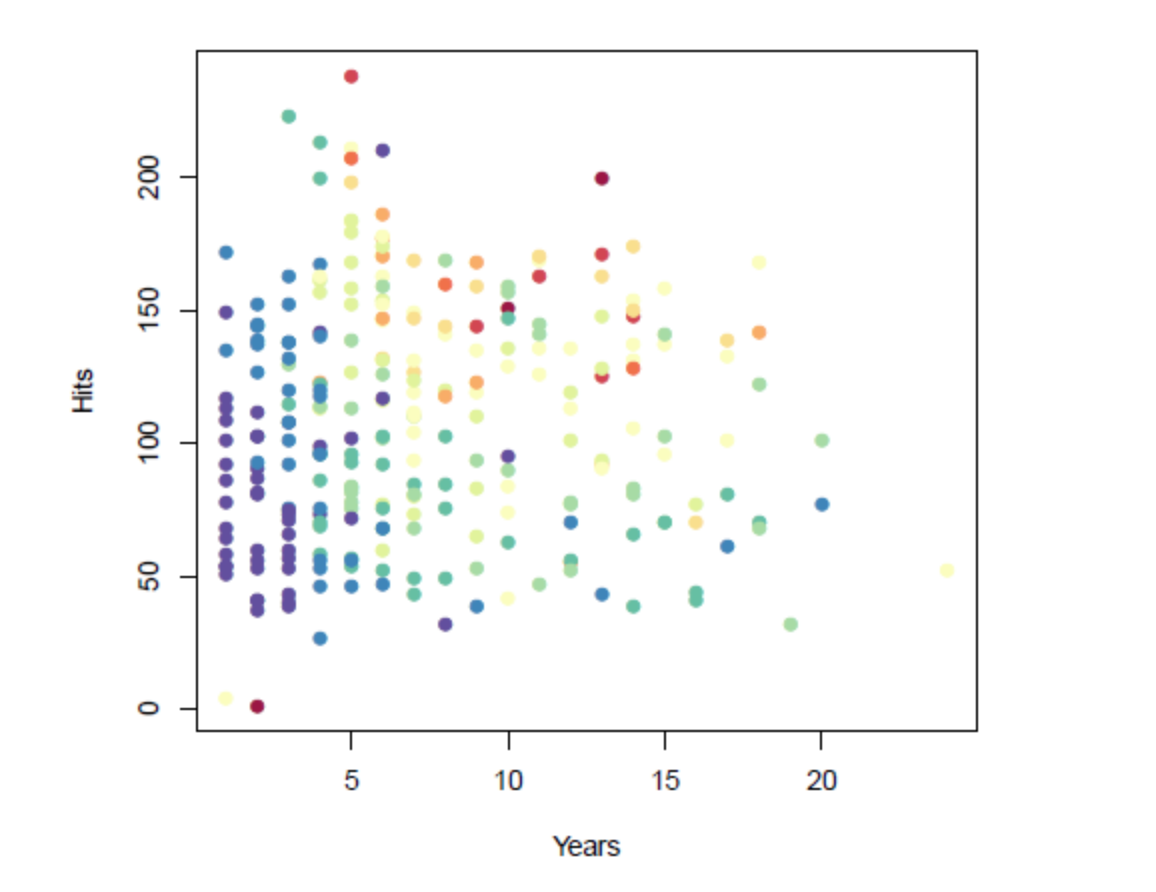
Can you predict how much salary a baseball player make based on their years of experiences and number of hits? <br>
- The plot represents the **training data** for predicting salary. <br>
- The **x-axis** represents the years of experiences playing baseball<br>
- The **y-axis** represents the number of hits<br>

**Goals**
- We want to build a model that predict how much a player makes based on hits and years 
- We are going to **segment**, or **partition** the feature space, and the value means (of yearly salary) will be the predicted value for the given region
- Intuitively, we want to maximize the **homogeneity**, or similarity within each region 



__Results of splitting, or segmenting the feature space__
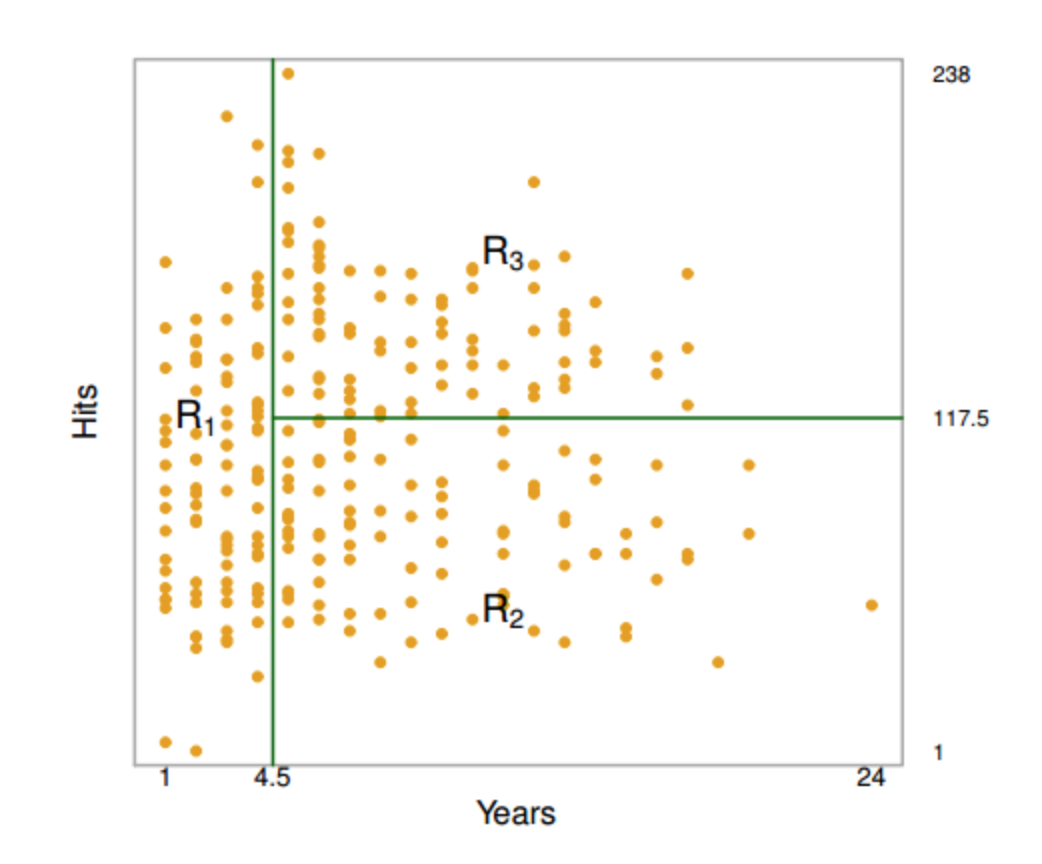

There are two steps to build a regression tree:
- We divide the feature space into J distinct and non-overlapping regions
- For each region, we use the mean value of that region as the prediction

Interpreting the partition above:
- We divided the features space X into R1, R2, R3 
- For players in R1, which are players who have played less than 4.5 years, make a mean salary of 225,000
- For players in R2, who play for more than 4.5 years **and** has less than 117.5 hits, make a mean salary of 464,917
- For players in R3, who play for more than 4.5 years **and** has more than 118 hits, make a mean salary of 949,171

Questions for students: <br>
1. Building on this model, how would you predict for a test set data player who played for 6 years, and has 112 hits?* <br>
2. How does regression tree's prediction differ from linear regression's?'<br>


**1.2 Regression Tree Cost Function**
- You ask, how does the tree decide where to split?
- Ideally, the tree finds the optimal split by minimizing the below cost function--the mean square error (mse) across all training observations and all regions
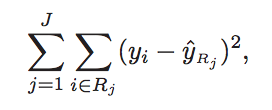

Unfortunately, it is computationally impossible to consider every single possibility of splitting into J regions, For this reason, the tree takes a **top-down**, **greedy approach** in splitting the feature space. 
- Top down: begins at the top of the tree from one single variable then successively splits the feature space
- Greedy: the best split is made at each step, instead of picking the best global or overall split

In our feature X, we pick a cut point *s* such that within region R1 < s and R2 > s leads to the **lowest** mse. After that, the tree will find another variable X2 and a cutpoint s and repeat the process above. 
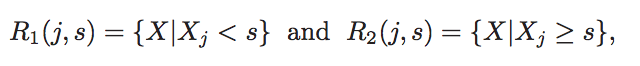
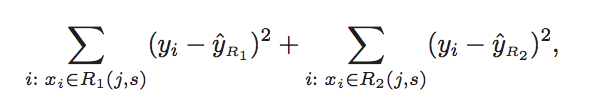

__1.3 Regression Tree implementation in Scikitlearn and Graphviz__

In [1]:
# implementing the tree using scikit learn
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
#import matplotlib.pyplot as plt
#import seaborn as sns
df = pd.read_csv("hitters.csv")
df.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [2]:
# dropping missing values for sake of model construction. In practice, we might need to do something different 
df = df[['Hits','Years','Salary']]
df.dropna(axis = 0, inplace = True)

In [3]:
# build a regression tree from sklearn 
# define predictors and predicted variables
# predictors: X
X = df[['Hits','Years']]
# outcome: y
y = df.Salary
#X1 refers to Years, and X0 refers to Hits

In [4]:
# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [5]:
#In this case, X0 refers to hits, and X1 refers to years
# instantiate a regression instance
regTree = DecisionTreeRegressor(max_depth=5)
# fit the tree
regTree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

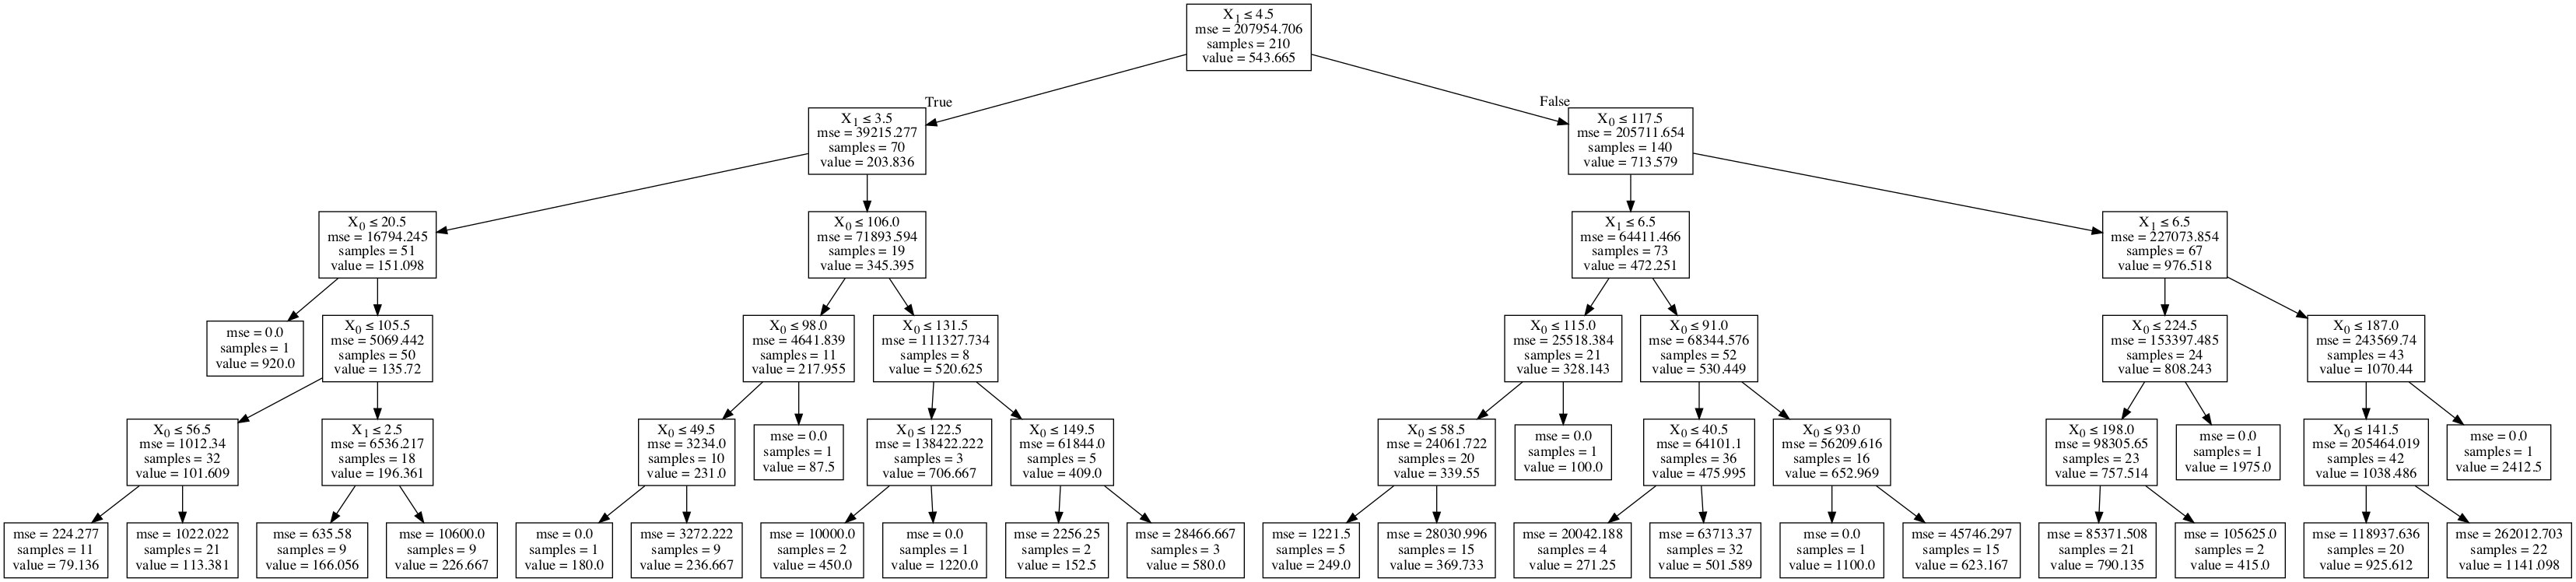

In [6]:
# visualizing the regression tree
dot_data = StringIO()
export_graphviz(regTree, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [7]:
# use the model to predict the testing and compare mse
regPred = regTree.predict(X_test)

In [8]:
# comparing the results and plot them 
mse = mean_squared_error(regPred, y_test)
mse

125225.71879956128

#### 1.4 Tuning & Pruning a Decision Tree
As the goal of the tree model is to find regions with the lowest mean square error, but how do we decide when to stop growing our tree? As we grow the tree deeper and deeper (pertaining to parameter maxdepth), we encounter the problem of overfitting (why and why is it bad?)

- The best option to tune hyperparameter max_depth is to grow the tree very deep and prune it back to a _subtree_ by using cross-validation to find the lowest possible MSE, -- this is known as the __validation curve__ 
    -  Formally, we define this function as the cost-complexity function
    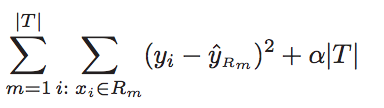
Therefore, we want to use k-fold cross-validation to find out the optimal depth of a regression tree. 
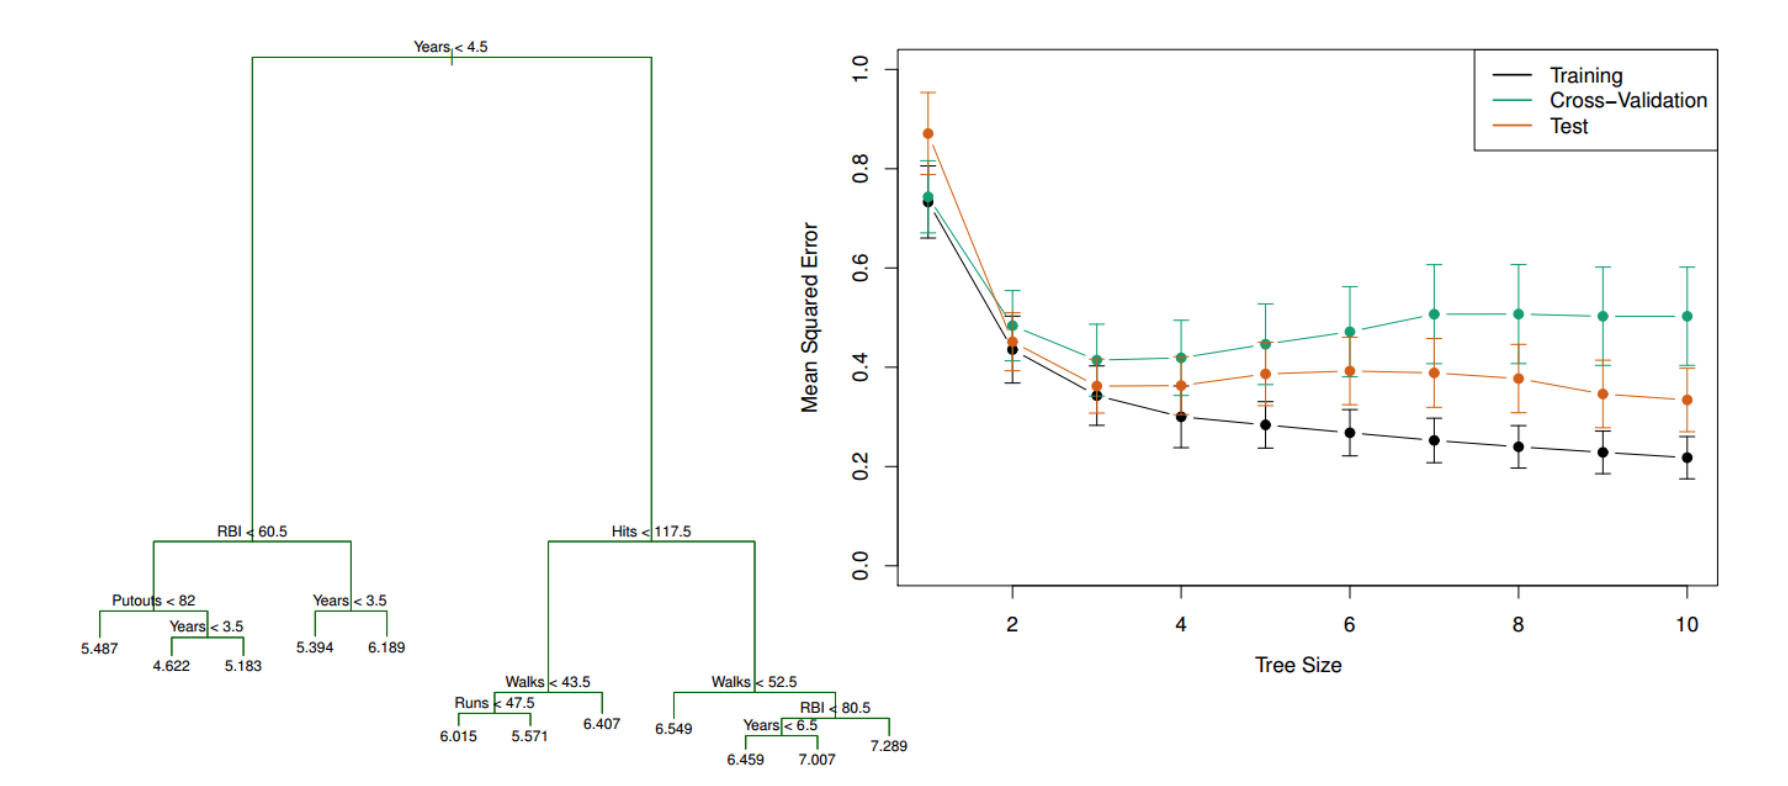

[-164555.23955995604, -119167.87237784303, -137412.21218284252, -160300.78189856999, -157784.78802503194, -173643.18462283936, -186130.61015450503, -196075.45501766368, -194665.48900890807]


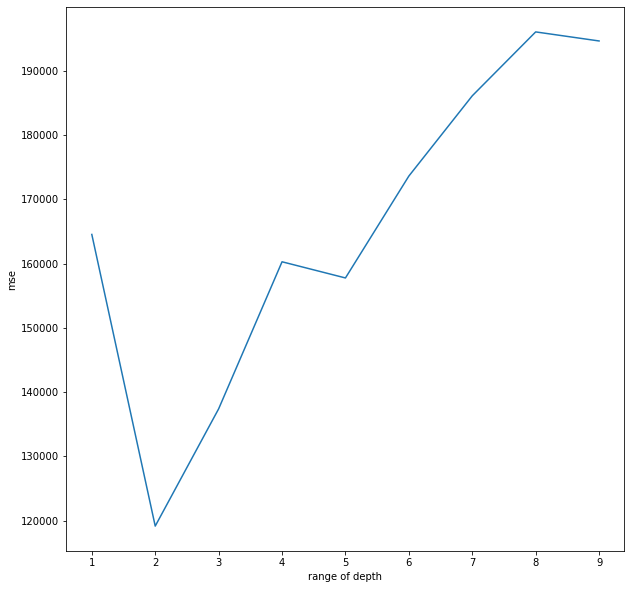

In [9]:
from sklearn.model_selection import cross_val_score
depth_range = range(1,10)
mse = []
for depth in depth_range:
    regtree = DecisionTreeRegressor(max_depth = depth)
    depth_score = cross_val_score(regtree, X, y, scoring = 'neg_mean_squared_error',cv = 6)
    mse.append(depth_score.mean())
print(mse)
mse = [abs(number) for number in mse]
plt.figure(figsize = (10,10))
plt.plot(depth_range, mse)
plt.xlabel('range of depth')
plt.ylabel('mse')
plt.show()


## 2. Classification Tree
Classification tree is very similar to regression tree--we use binary and recursive splitting in the feature space to group similar observations into regions. The difference is classification tree predict a **qualitative, or categorical** outcome.

We predict that each observation belongs to the most ___commonly occuring class___ of training observations in the region it belongs to. 

In [10]:
iris=datasets.load_iris()
X_iris=pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris=iris.target

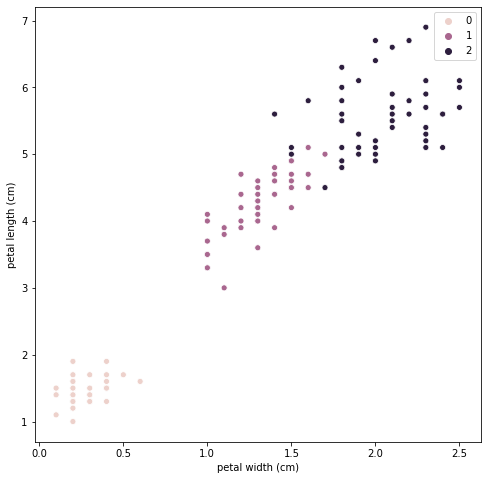

In [11]:
# visualizing the iris dataset 
import seaborn as sns
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x = X_iris['petal width (cm)'], y = X_iris['petal length (cm)'], hue = iris.target)

##### Because we can no longer evaluate the performance of classification tree with MSE, we need to learn some new criteria for evaluating classification trees. 
These criteria are:
- **Classification Error Rate**
    -  Simply, the fraction of the training observations that does not belong to the most common class
    -  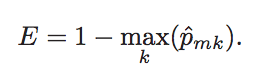
    - Example: predict whether a group of students are more likely to use Coursera or DataCamp:
        - At a particular node, 50 observations were made. 40 people used Datacamp and 10 bought Coursera. Since the majority is DataCamp, the prediction error is calculated as 1-(40/50), or 10/50 = 20%
- **Gini Purity Index**
    -  Gini measures how "pure" is the result of the split, and it ranges from 0 to 0.5. A low Gini score indicates a node has perfect purity (only one class), whereas a higher score indicates a mix of classes. 
    -  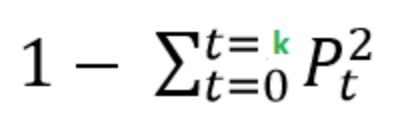
    one minus the squared probability of each class occuring
    -  Example: Predicting people's choice of buying smartphones. 
        - Given that out of a total of 25 people, 15 people bought iPhones and 10 bought Androids, the Gini is calculated as 
        - 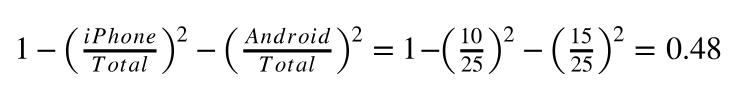

- __Entropy__
Entropy measures the uncertainty, or inpurity of the variable. A high entropy reflects messy data and low information gain at the split, and low entropy reflects pure split.
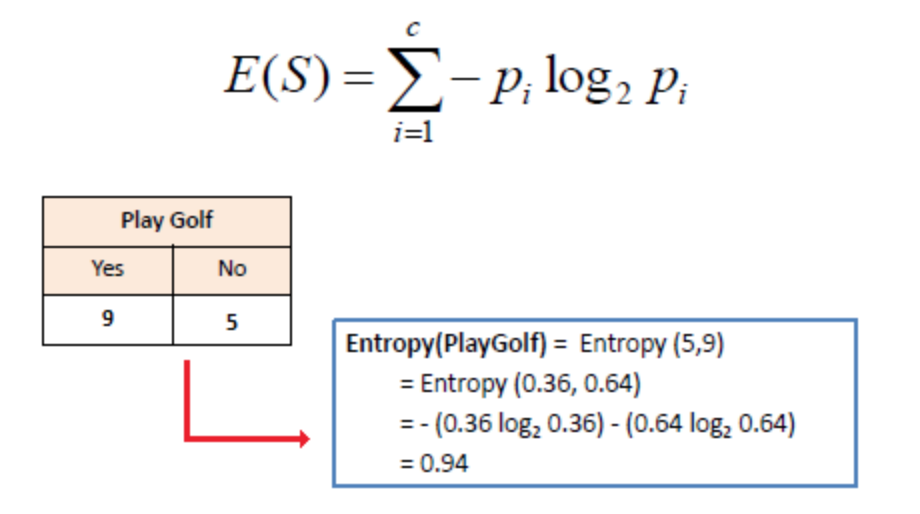

<img src = "https://media.giphy.com/media/3q3WuBCjZzE6CznOPg/giphy.gif">

In [12]:
P_yes = 9/(9+5)
P_no = 5/(9+5)
entropy = -(P_yes*np.log2(P_yes)) - (P_no*np.log2(P_no))
entropy

0.9402859586706311

Question for students:
- Based on these measurements, do you think we made a good split for Iris data?

- Let's find out!

In [13]:
X_train_iris,X_test_iris,y_train_iris,y_test_iris = train_test_split(X_iris, y_iris, test_size = 0.2, random_state = 42)

In [14]:
from sklearn.tree import DecisionTreeClassifier
ctree=DecisionTreeClassifier(max_depth = 2)
ctree.fit(X_train_iris,y_train_iris)

DecisionTreeClassifier(max_depth=2)

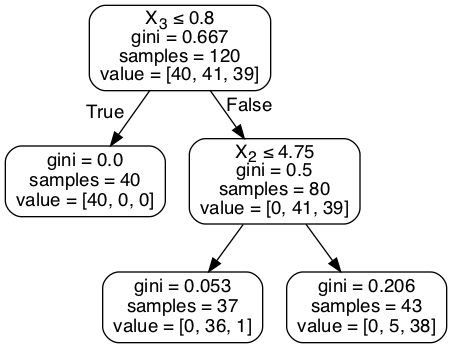

In [15]:
dot_data = StringIO()
export_graphviz(ctree, out_file=dot_data,  
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [16]:
clasPred = ctree.predict(X_test_iris)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_iris, clasPred)

0.9666666666666667

The ‘value’ row in each node tells us how many of the observations that were sorted into that node fall into each of our three categories. We can see that our feature X2, which is the petal length, was able to completely distinguish one species of flower (Iris-Setosa) from the rest.

[0.6666666666666667, 0.9533333333333334, 0.96, 0.96, 0.96, 0.9533333333333334, 0.96, 0.96, 0.96]


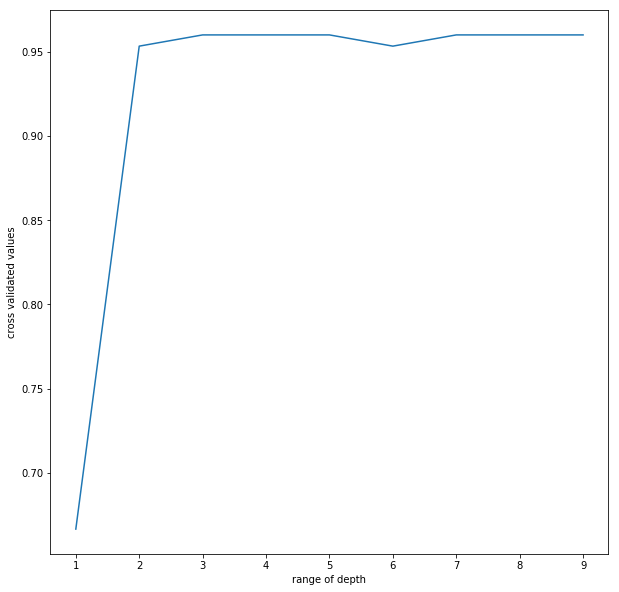

In [20]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(ctree, X_iris, y_iris, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(ctree, X_iris, y_iris, cv = 10)
    val.append(depth_score.mean())
print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.show()

In [21]:
import matplotlib

In [24]:
matplotlib.__version__

'3.1.1'

### Questions & Discussion
1. Based on the tutorial today, what are the advantages and disadvantages of cart you can think of?
2. Under what circumstances would the tree perform better than linear regression, and vice versa?

### Advantages and Disadvantages of Trees
#### Advantages 
- Can be used for both classification and regression
- Can be displayed graphically
- Easily interpretable
- Non-parametric (does not make any assumptions of the underlying distribution of data), unlike linear regression
- Features don't need scaling 
- Automatically accounting for interaction

#### Disadvantages:
- Tend to not perform very well compared to state of the art ML models 
- Recursive binary splitting makes "locally optimal" decisions that may not result in a globally optimal tree
- Can easily lead to overfitting
- Has really high variances and instable

<img src="attachment:Screen%20Shot%202019-03-18%20at%2010.24.39%20AM.png" style="width:500px;">

#### Good resources:
- How to plot the [cross-validation curve](https://chrisalbon.com/machine_learning/model_evaluation/plot_the_validation_curve/)
- [Entropy and Information Gain](https://medium.com/udacity/shannon-entropy-information-gain-and-picking-balls-from-buckets-5810d35d54b4)

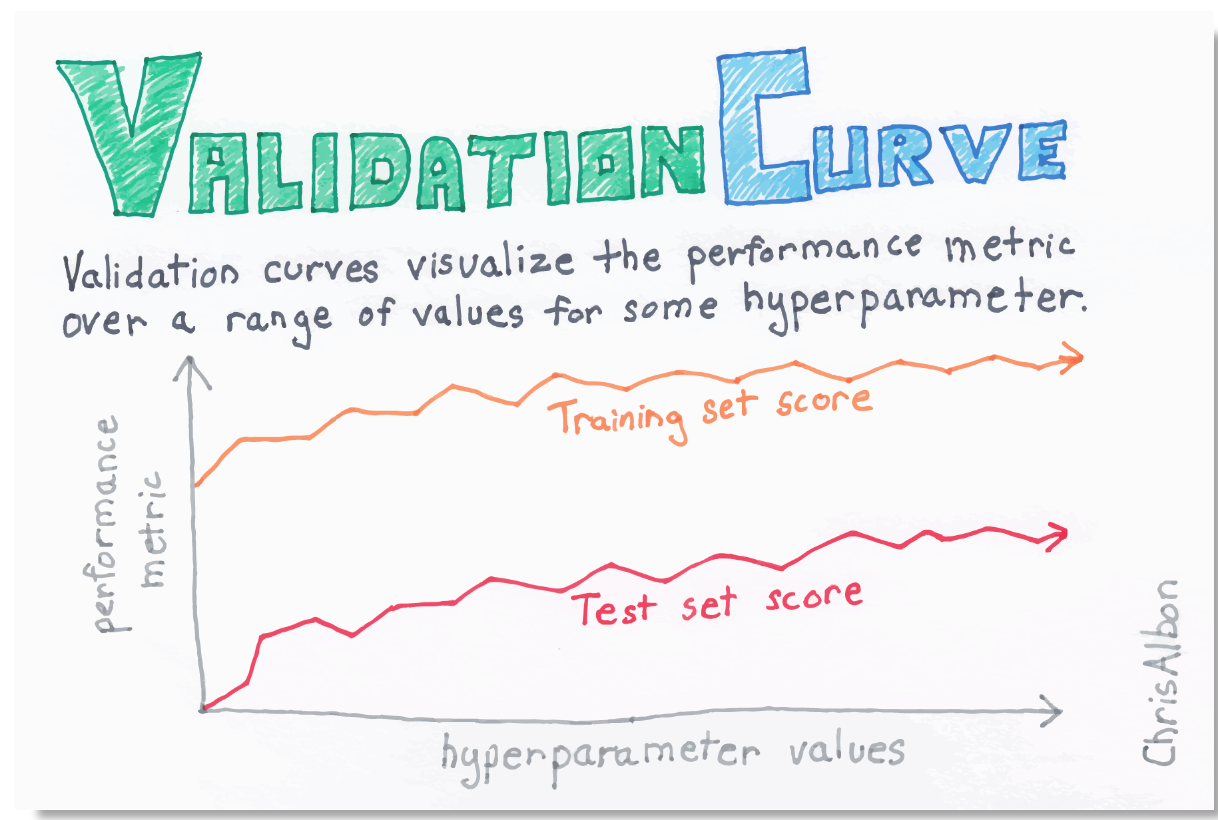
Credit: Chris Albon